# Modèle prédictif : valeur des logements en Californie

L'objectif est de créer un modèle avec vos données (train) pour prédire la valeur du prix médian des maisons par district / bloc (medianHouseValue). A la fin du projet, vous devez évaluer ce modèle avec les données (validation) que seul votre client dispose (le prof).

* longitude
* latitude
* housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
* totalRooms: Nombre total de chambres dans un bloc
* totalBedrooms: Nombre total de chambres dans un bloc
* population: Nombre total de personnes résidant dans un bloc
* households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
* medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
* medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
* oceanProximity: Situation de la maison par rapport à la mer

# Exploratory data analysis

Import des librairies

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

Import de l’ensemble des données du Dataset

In [213]:
immo_df = pd.read_csv("C:/Users/zaome/Documents/Arthuro/Projet_agent_immo/train_data.csv")
immo_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-120,37,6,"1,853",473,"1,397",417,1,"72,000",INLAND
1,10600,-118,34,8,"2,032",349,862,340,7,"274,100",<1H OCEAN
2,2494,-120,37,25,875,214,931,214,2,"58,300",INLAND
3,4284,-118,34,31,622,229,597,227,2,"200,000",<1H OCEAN
4,16541,-121,38,21,"1,922",373,"1,130",372,4,"117,900",INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-122,40,20,"1,465",278,745,250,3,"93,800",INLAND
16508,18898,-122,38,49,"2,365",504,"1,131",458,3,"103,100",NEAR BAY
16509,11798,-121,39,19,"2,531",461,"1,206",429,4,"192,600",INLAND
16510,6637,-118,34,39,"2,776",840,"2,546",773,3,"153,500",<1H OCEAN


Suppression de la première colonne "Unnamed : 0"

In [214]:
immo_df = immo_df.drop(columns=["Unnamed: 0"], axis=1)
immo_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120,37,6,"1,853",473,"1,397",417,1,"72,000",INLAND
1,-118,34,8,"2,032",349,862,340,7,"274,100",<1H OCEAN
2,-120,37,25,875,214,931,214,2,"58,300",INLAND
3,-118,34,31,622,229,597,227,2,"200,000",<1H OCEAN
4,-121,38,21,"1,922",373,"1,130",372,4,"117,900",INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-122,40,20,"1,465",278,745,250,3,"93,800",INLAND
16508,-122,38,49,"2,365",504,"1,131",458,3,"103,100",NEAR BAY
16509,-121,39,19,"2,531",461,"1,206",429,4,"192,600",INLAND
16510,-118,34,39,"2,776",840,"2,546",773,3,"153,500",<1H OCEAN


Dataset Overview

In [215]:
rows, cols = immo_df.shape
print("Lignes:",rows, "Colonnes:",cols)

Lignes: 16512 Colonnes: 10


Affichage des 5 première lignes

In [216]:
immo_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-120,37,6,"1,853",473,"1,397",417,1,"72,000",INLAND
1,-118,34,8,"2,032",349,862,340,7,"274,100",<1H OCEAN
2,-120,37,25,875,214,931,214,2,"58,300",INLAND
3,-118,34,31,622,229,597,227,2,"200,000",<1H OCEAN
4,-121,38,21,"1,922",373,"1,130",372,4,"117,900",INLAND


Information sur le Dataset

In [217]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Statistiques descriptives

In [219]:
immo_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,"16,512","16,512","16,512","16,512","16,336","16,512","16,512","16,512","16,512"
mean,-120,36,29,"2,644",539,"1,435",501,4,"206,509"
std,2,2,13,"2,214",425,"1,158",386,2,"115,226"
min,-124,33,1,6,2,3,2,0,"14,999"
25%,-122,34,18,"1,446",296,788,280,3,"119,400"
50%,-118,34,29,"2,116",435,"1,168",410,4,"179,300"
75%,-118,38,37,"3,154",647,"1,738",606,5,"264,500"
max,-114,42,52,"39,320","6,445","35,682","6,082",15,"500,001"


Types de données

In [243]:
immo_df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [244]:
immo_df.dtypes.value_counts()

float64    9
object     1
dtype: int64

### Copy du Dataset

In [246]:
df_copy = immo_df.copy()

In [372]:
df_copy.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity',
       'rooms_per_household', 'bedrooms_per_household',
       'population_per_household'],
      dtype='object')

In [251]:
df_copy.shape

(16512, 10)

In [254]:
df_copy.dtypes.value_counts()

float64    9
object     1
dtype: int64

## Datat sourcing

### Duplicates

In [256]:
df_copy.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
16507    False
16508    False
16509    False
16510    False
16511    False
Length: 16512, dtype: bool

Pour trouver des doublons sur des colonnes spécifiques

In [257]:
df_copy.duplicated(subset=['ocean_proximity'])

0        False
1        False
2         True
3         True
4         True
         ...  
16507     True
16508     True
16509     True
16510     True
16511     True
Length: 16512, dtype: bool

Supprimer les duplicates

In [258]:
df_copy.drop_duplicates

<bound method DataFrame.drop_duplicates of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0           -120        37                   6        1,853             473   
1           -118        34                   8        2,032             349   
2           -120        37                  25          875             214   
3           -118        34                  31          622             229   
4           -121        38                  21        1,922             373   
...          ...       ...                 ...          ...             ...   
16507       -122        40                  20        1,465             278   
16508       -122        38                  49        2,365             504   
16509       -121        39                  19        2,531             461   
16510       -118        34                  39        2,776             840   
16511       -124        41                  31        2,152             462   

       p

### Missing Data

In [434]:
miss_data = df_copy.isnull().sum().sum()
print("Missing Data:",round((miss_data/rows)*100,3),"%")

Missing Data: 2.132 %


In [435]:
import math 

total_bedrooms_median = math.floor(df_copy["total_bedrooms"].median())
print(total_bedrooms_median)

435


In [224]:
# percent_missing = immo_df.isnull().sum() * 100 / len(immo_df)
# percent_missing

#### Gestion des valeurs manquantes

Affichage des données manquantes

In [260]:
df_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nombre de cellules nulles (non renseignées) par colonnes

In [261]:
df_copy.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Nombre de cellules non nulles (renseignées) par colonnes

In [262]:
df_copy.notnull().sum()

longitude             16512
latitude              16512
housing_median_age    16512
total_rooms           16512
total_bedrooms        16336
population            16512
households            16512
median_income         16512
median_house_value    16512
ocean_proximity       16512
dtype: int64

### Outliers

#### Visualization

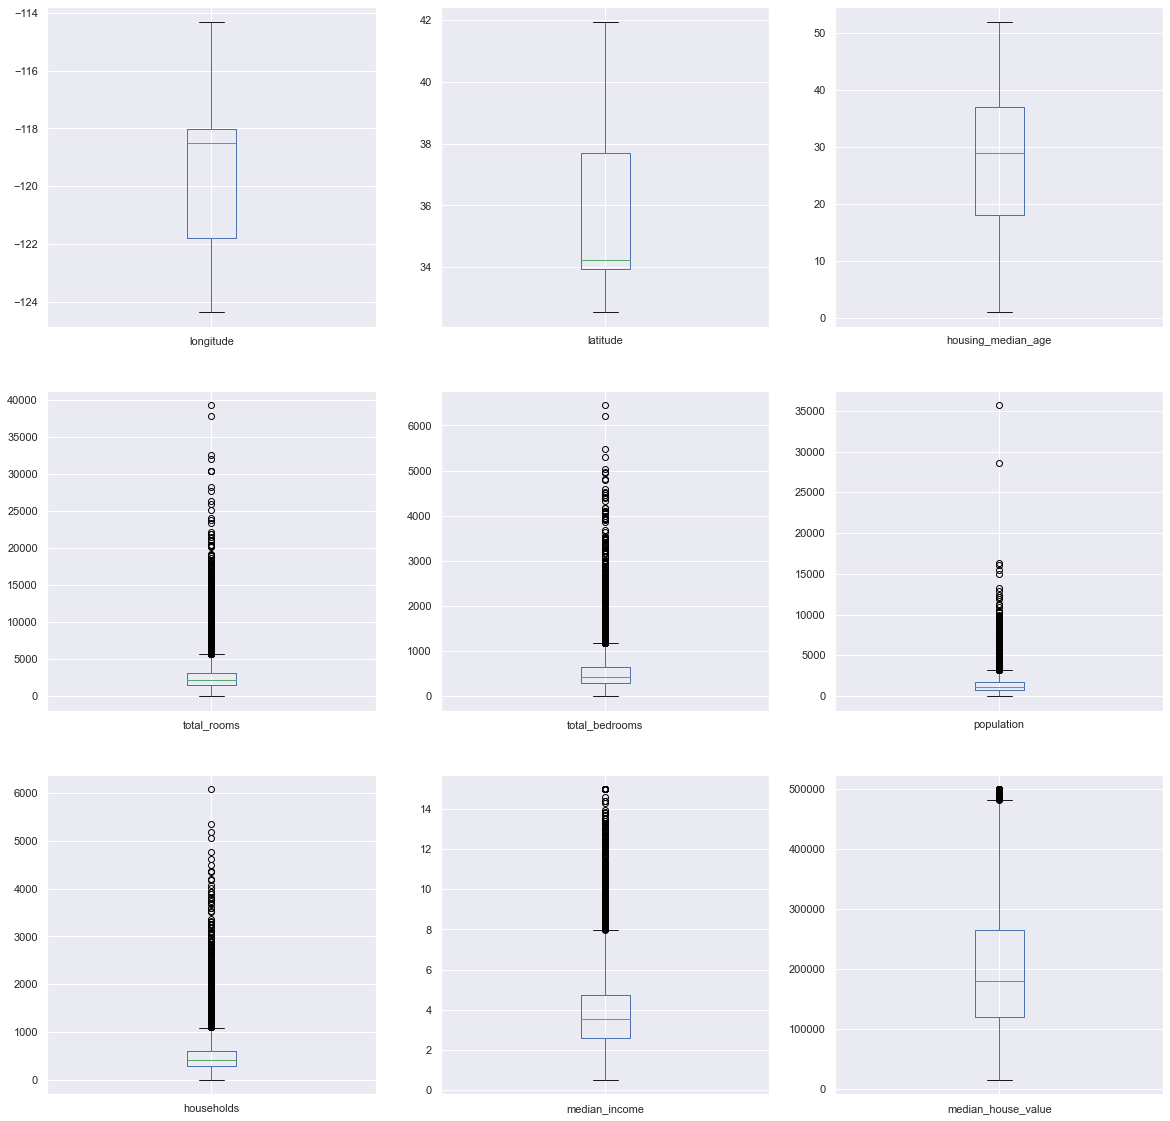

In [263]:
#colums = list(immo_df.colums)
df_copy.plot(kind='box', subplots=True, layout=(3, 3), figsize = (20, 20))
plt.show()

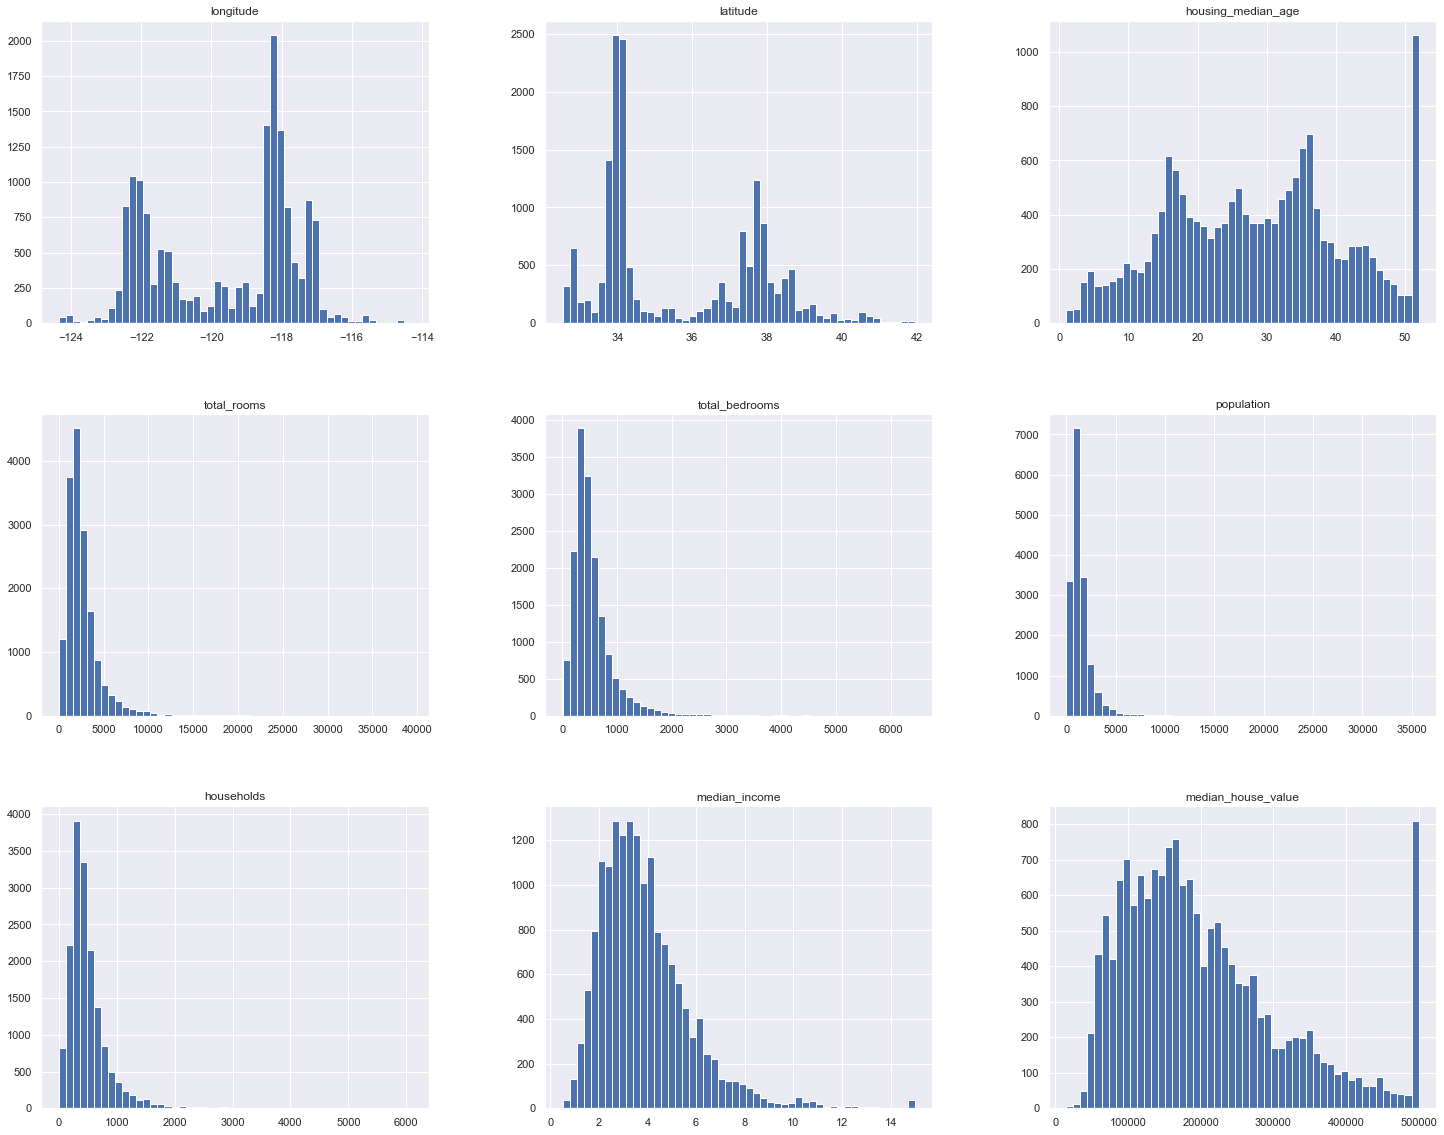

In [264]:
df_copy.hist(bins=50, figsize=(25,20))
plt.show()

### Analyse de la variable 'median_house_value'

Affichage de la moyenne sur la colonne 'median_house_value'

In [265]:
df_copy['median_house_value'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        72,000
1       274,100
2        58,300
3       200,000
4       117,900
          ...  
16507    93,800
16508   103,100
16509   192,600
16510   153,500
16511    81,100
Name: median_house_value, Length: 16512, dtype: float64>

<AxesSubplot:>

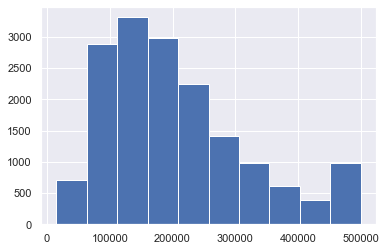

In [266]:
df_copy['median_house_value'].hist()

### Analyse de la variable 'ocean_proximity'

Nombre de chaque catégorie dans la colonne 'ocean_proximity'

In [348]:
df_copy['ocean_proximity'].value_counts()

0    7312
1    5235
4    2140
3    1821
2       4
Name: ocean_proximity, dtype: int64

In [349]:
df_copy['ocean_proximity'].value_counts(normalize=True)

0   0
1   0
4   0
3   0
2   0
Name: ocean_proximity, dtype: float64

Transformations de la catégorie 'ocean_proximity'

In [356]:
df_copy['ocean_proximity'].unique()

array([1, 0, 4, 3, 2])

In [357]:
from sklearn.preprocessing import LabelEncoder

In [358]:
Encoder = LabelEncoder()
df_copy.ocean_proximity=Encoder.fit_transform(df_copy.ocean_proximity)

In [359]:
df_copy['ocean_proximity'].unique()

array([1, 0, 4, 3, 2], dtype=int64)

In [360]:
df_copy['ocean_proximity'].value_counts()

0    7312
1    5235
4    2140
3    1821
2       4
Name: ocean_proximity, dtype: int64

In [370]:
#Encoder.inverse_transform(np.array([1, 0, 4, 3, 2]))

0 : <1H OCEAN
1 : INLAND
2 : ISLAND
3 : NEAR BAY
4 : NEAR OCEAN

### Data preprocessing

Feature engineering

In [299]:
df_copy['rooms_per_household']=df_copy['total_rooms']/df_copy['households']

In [301]:
df_copy['bedrooms_per_household']=df_copy['total_bedrooms']/df_copy['households']

In [302]:
df_copy['population_per_household']=df_copy['population']/df_copy['households']

In [371]:
df_copy.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
0,6,"1,853",473,"1,397",417,1,"72,000",1,4,1,3
1,8,"2,032",349,862,340,7,"274,100",0,6,1,3
2,25,875,214,931,214,2,"58,300",1,4,1,4
3,31,622,229,597,227,2,"200,000",0,3,1,3
4,21,"1,922",373,"1,130",372,4,"117,900",1,5,1,3


In [363]:
df_copy = df_copy.drop(['longitude','latitude'], axis=1)

In [364]:
df_copy.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household
count,"16,512","16,512","16,336","16,512","16,512","16,512","16,512","16,512","16,512","16,336","16,512"
mean,29,"2,644",539,"1,435",501,4,"206,509",1,5,1,3
std,13,"2,214",425,"1,158",386,2,"115,226",1,2,0,11
min,1,6,2,3,2,0,"14,999",0,1,0,1
25%,18,"1,446",296,788,280,3,"119,400",0,4,1,2
50%,29,"2,116",435,"1,168",410,4,"179,300",1,5,1,3
75%,37,"3,154",647,"1,738",606,5,"264,500",1,6,1,3
max,52,"39,320","6,445","35,682","6,082",15,"500,001",4,133,34,"1,243"


C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zaome\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

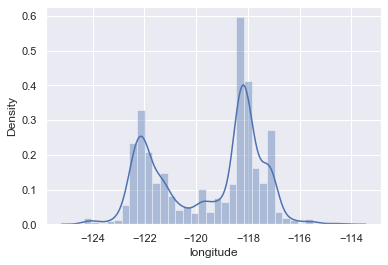

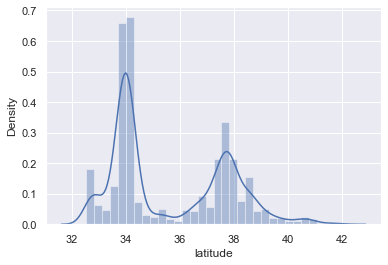

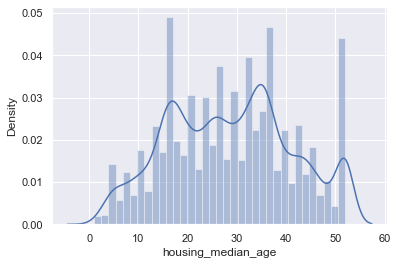

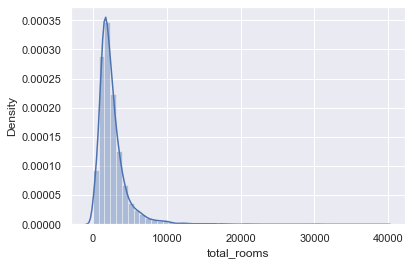

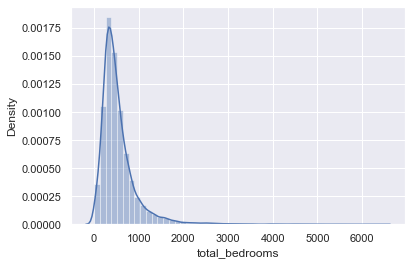

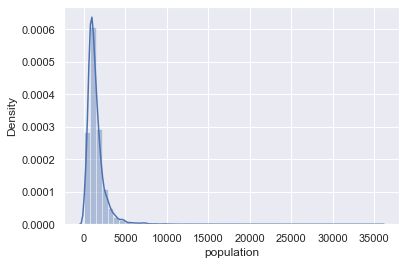

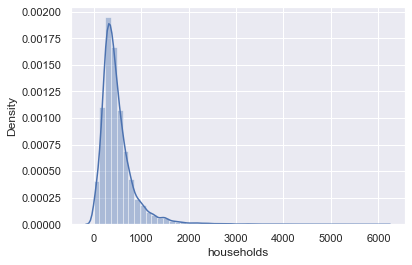

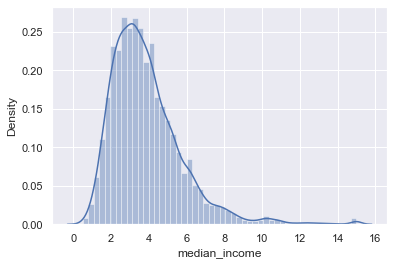

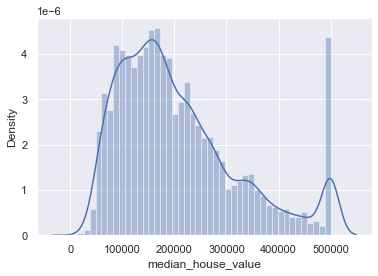

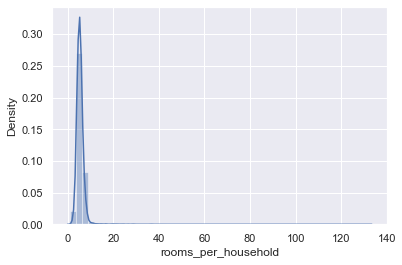

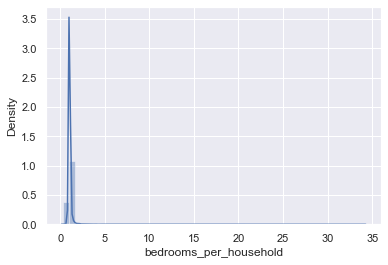

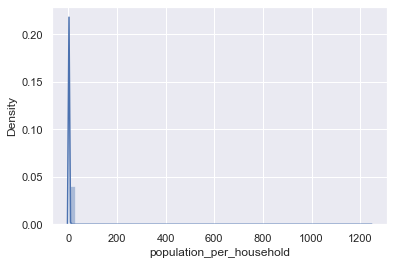

In [308]:
for col in df_copy.select_dtypes('float'):
    plt.figure()
    sns.distplot(df_copy[col])

<AxesSubplot:ylabel='ocean_proximity'>

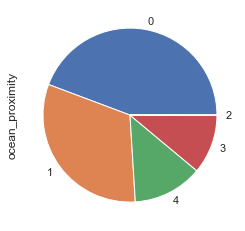

In [274]:
df_copy['ocean_proximity'].value_counts().plot.pie()

<AxesSubplot:>

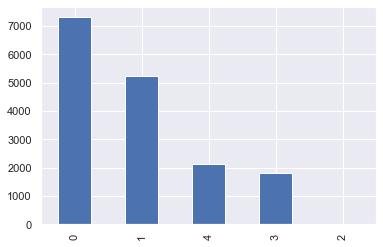

In [275]:
df_copy['ocean_proximity'].value_counts().plot(kind='bar')

### Analyse de la distribution de l'ensemble de données

Etude de variation et correlation

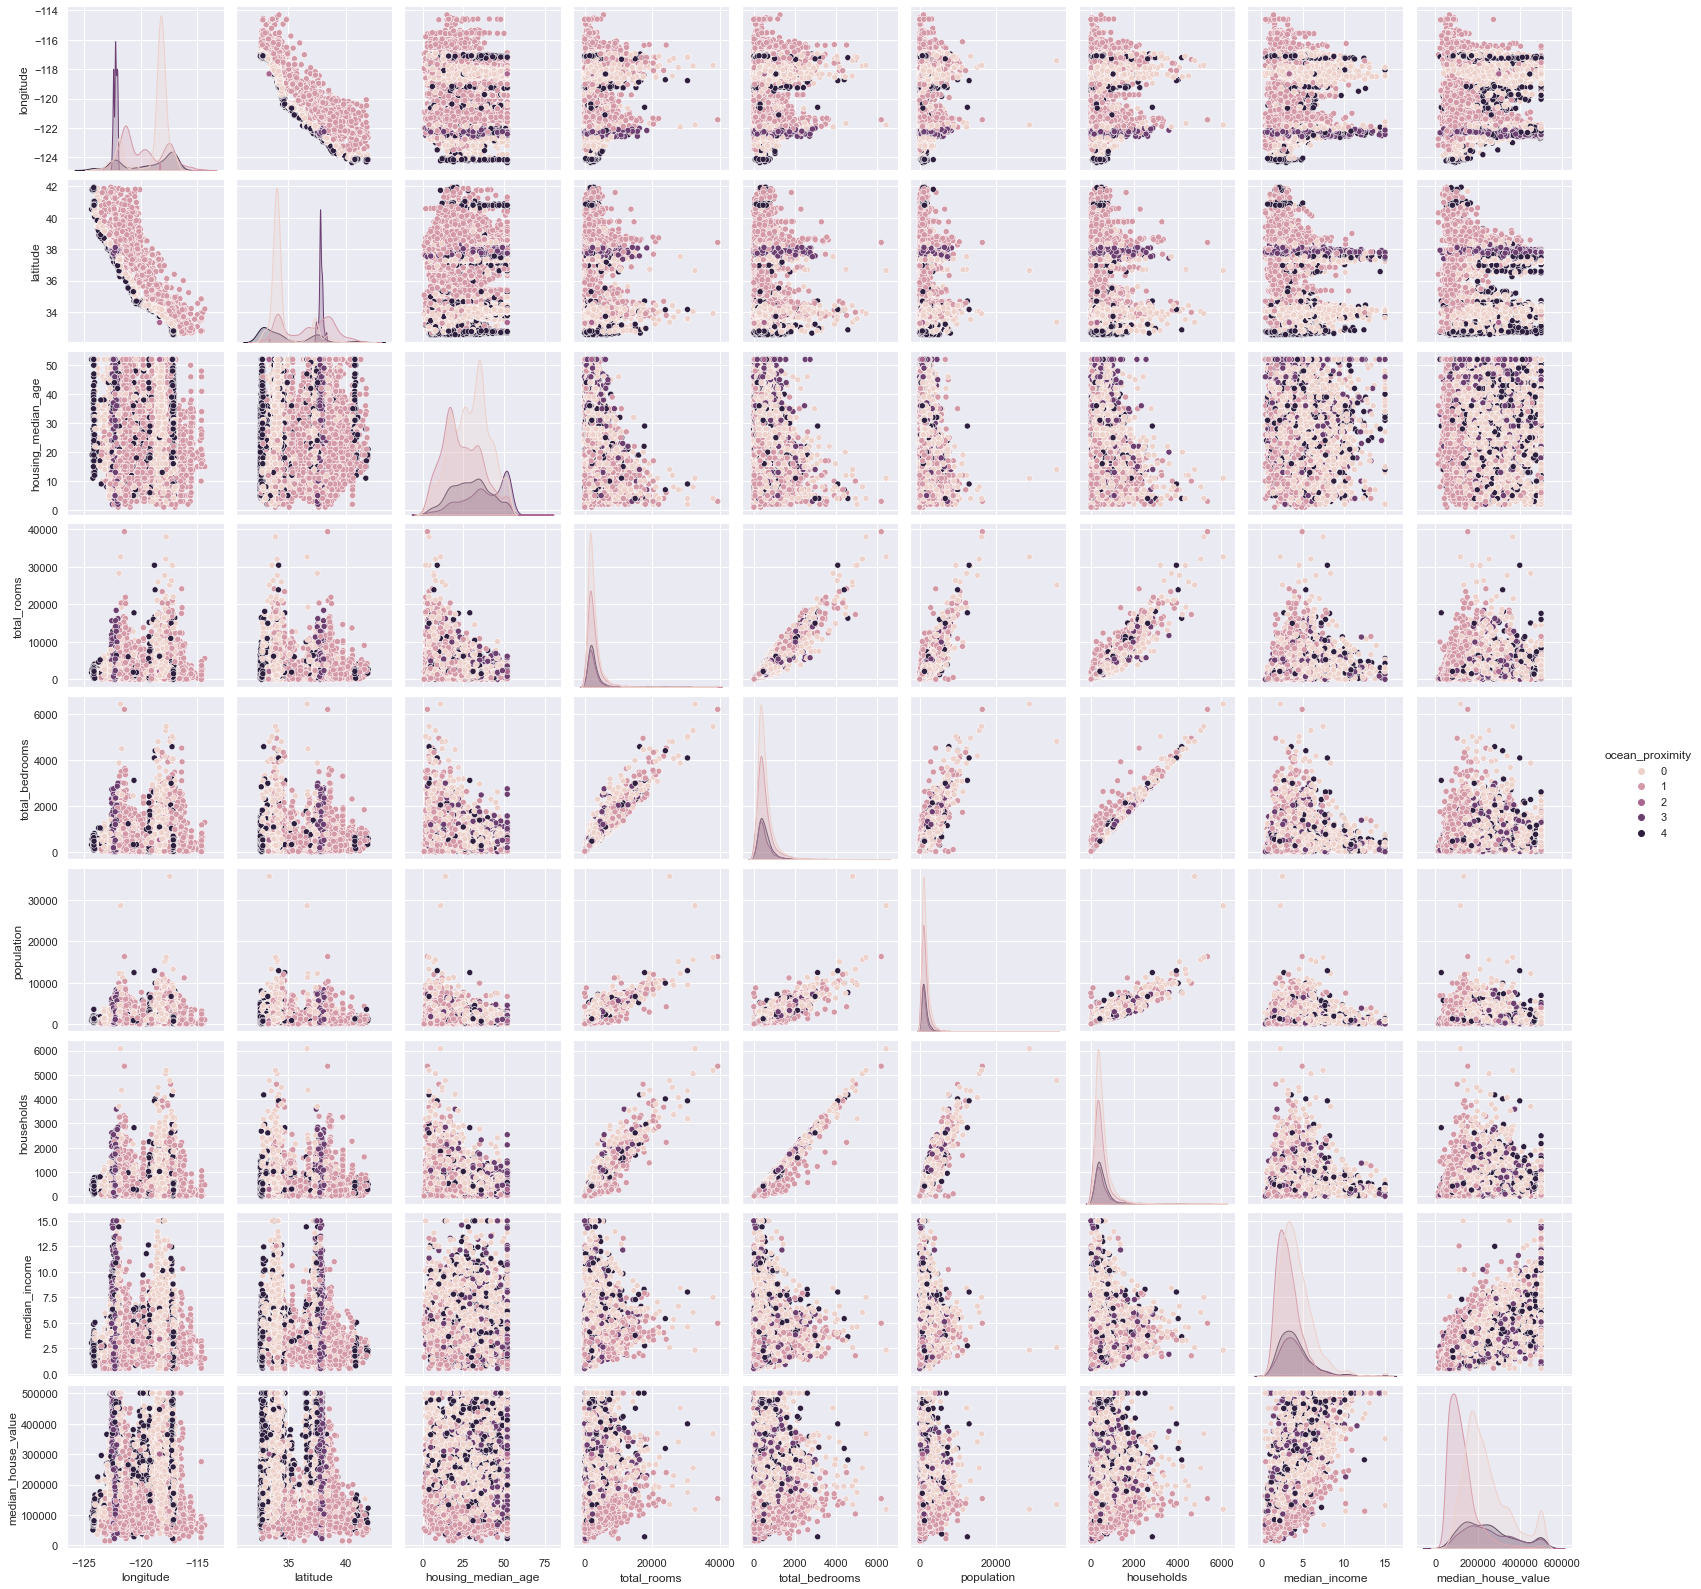

In [278]:
sns.pairplot(data = df_copy, hue="ocean_proximity")

<AxesSubplot:>

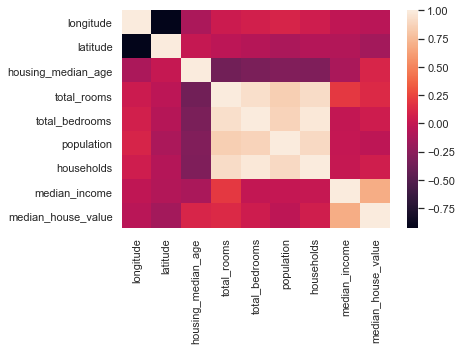

In [285]:
sns.heatmap(df_copy.select_dtypes('float').corr())

### Target

In [369]:
df_copy.describe()['median_house_value']
df_copy.shape

(16512, 11)

<AxesSubplot:>

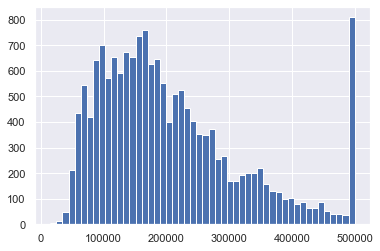

In [298]:
df_copy['median_house_value'].hist(bins= 50)

### Encodage and Traintest

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [391]:
# define X, y
X = df_copy.drop('median_house_value', axis=1)
y = df_copy['median_house_value']

In [375]:
# Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                     test_size=.3, 
#                                                     random_state=1)

In [376]:
#X.shape
df_copy.shape

(16512, 11)

In [417]:
trainset, testset = train_test_split(df_copy, test_size=0.3, random_state=1)

### X_train, y_train

In [418]:
X_train=trainset.drop(['median_house_value'],axis=1)

In [419]:
y_train=trainset['median_house_value']

In [420]:
trainset.shape

(11558, 11)

In [421]:
X_train.shape

(11558, 10)

In [422]:
y_train

1703    161,200
12531   188,800
7966     97,300
8599     58,000
13440   376,800
          ...  
7813    169,900
10955   500,001
5192    163,900
12172   285,200
235     215,400
Name: median_house_value, Length: 11558, dtype: float64

In [423]:
# calculate the score
#dummy_clf.score(X_train, y_train)

### X_test y_test

In [424]:
X_test=testset.drop(['median_house_value'],axis=1)

In [425]:
y_test=testset['median_house_value']

In [426]:
testset.shape

(4954, 11)

In [427]:
y_test

11418   284,900
6821    202,800
9138    118,100
4175    117,800
15220   103,800
          ...  
14809   162,500
14192   123,400
3985     71,700
1987    203,200
8271    249,000
Name: median_house_value, Length: 4954, dtype: float64

In [428]:
# calculate the score
#dummy_clf.score(X_test, y_test)

In [429]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [430]:
dummy_clf = DummyClassifier(strategy="most_frequent")

# fit the modem
dummy_clf.fit(X_train, y_train)

# calculate the score
dummy_clf.score(X_test, y_test)

0.04400484457004441

### Pipeline transform

In [407]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,PolynomialFeatures
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

In [396]:
X_train.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_household', 'population_per_household'],
      dtype='object')

In [403]:
X_test.dtypes.value_counts()

float64    11
int32       1
dtype: int64

In [404]:
numerical_features = list(X_train.select_dtypes(include=['float64']))
categorical_features = list(X_train.select_dtypes(include=['int32']))

In [405]:
numerical_features

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_household',
 'population_per_household']

In [406]:
categorical_features

[]

In [401]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])

In [402]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [413]:
from sklearn.linear_model import SGDClassifier

In [2]:
# scaler = StandardScaler()
# X_train_transformed = scaler.fit_transform(X_train)

# model = SGDClassifier(random_state = 0)
# model.fit(X_train_transformed, y_train)

# X_test_transformed = scaler.transform(X_test)
# model.predict(X_test_transformed)

In [1]:
# model = make_pipeline(StandarScaler(),
#                      SGDClassifier())

# model.fit(X_train, y_train)
# model.predict(X_test)